<a href="https://colab.research.google.com/github/esghasemi/Machine-Learning/blob/Mini-project-4/mini_proj_4_40114624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A**

## **Q-Learning**

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### **Maze**

In [ ]:
class wumpusMaze:
    def __init__(self, width=4, height=4,items="WG",pitProb=0.2):
        self.maze=[]
        self.xPos = 1
        self.yPos = 1
        self.width=width
        self.height=height
        self.items=items

        #Probability of a pit occuring
        self.pitProb=pitProb
        self.alive=True
        self.stench=False
        self.glitter=False
        self.breeze=False
        self.bump=False
        self.score=0.0
        self.total_score = []

        #Locations to save game state in case of death
        self.goldLocY=0
        self.goldLocX=0
        self.wumpLocY=0
        self.wumpLocX=0
        self.wumpusAlive=True
        self.resetAgent()
 # -------------------------------------------------------------------
    def isSolvable(self):
        #RandomWalk to check is maze is solvable
        xm=[0,1,0,-1]
        ym=[-1,0,1,0]
        maxSteps = 10000
        tx=1
        ty=1

        for i in range(maxSteps):
                #Random action of up,down,left or right
                action = numpy.random.choice([0,1,2,3])
                #Is this new position within the bounds of the maze (index of list)?
                if tx+xm[action]>=self.width+1 or tx+xm[action]<1 or ty+xm[action]>=self.height+1 or ty+xm[action]<1:
                    continue
                #Is this new position a PIT or WUMPUS?
                if self.maze[tx+xm[action]][ty+ym[action]]=='P' or self.maze[tx+xm[action]][ty+ym[action]]=='W' or self.maze[tx+xm[action]][ty+ym[action]]=='X':
                    continue
                else:
                    #If new position is '.' or 'G'
                    tx=tx+xm[action]
                    ty=ty+ym[action]
                    #If we found 'G' by only walking on '.', the maze is solvable
                    if self.maze[tx][ty]=='G':
                        print("Maze is solveable")
                        return True
        #Couldnt reach 'G' by following only '.'
        return False

 # -------------------------------------------------------------------
    def makeRandomMaze(self):
        #Creates a token world to start isSolvable.
        for i in range(self.width+2):
            row = []
            for j in range(self.height+2):
                if numpy.random.random()<self.pitProb:
                    row.append('P')
                else:
                    row.append('.')
            self.maze.append(row)
        while not self.isSolvable():
            #Clears tokenWorld of not solvable world
            self.maze.clear()
            #Creates new world, appends pits(20% chance):'P' and paths:'.'
            for i in range(self.width+2):
                row = []
                for j in range(self.height+2):
                    if numpy.random.random()<self.pitProb:
                        row.append('P')
                    else:
                        row.append('.')
                self.maze.append(row)
            count = self.width+2
            #Sets the outer bounds to walls: 'X'
            for k in range(count):
                self.maze[0][k]='X'
                self.maze[k][0]='X'
                self.maze[count-1][k]='X'
                self.maze[k][count-1]='X'

            #Sets index 1,1 to player position: 'A'
            self.maze[1][1]='A'

            for i in self.items:
                x = numpy.random.choice([1,2,3,4])
                y = numpy.random.choice([1,2,3,4])
                #Last item is gold, sets location for game state in case of taking gold and dying. This resets gold.
                self.goldLocX=x
                self.goldLocY=y

                #Makes sure 'G' or 'W' does not append to 1,1 or each others position
                while not self.maze[x][y]=='.' or (x==1 and y==1):
                    x = numpy.random.choice([1,2,3,4])
                    y = numpy.random.choice([1,2,3,4])
                self.maze[x][y]=i

        #Maze now exists and has locations for 'G' and 'W' for game state
        self.mazeExists=True
        return maze

 # -------------------------------------------------------------------
    def shootArrow(self,direction):
        #Shoots arrow in direction up,down,left or right
        self.score=self.score-10
        if direction==2:
            if self.maze[self.xPos][self.yPos+1]=='W':
                self.score=self.score+50
                self.maze[self.xPos][self.yPos+1]='.'
                self.wumpLocY=self.yPos+1
                self.wumpLocX=self.xPos
                print(maze)
                print("Wumpus emits a horrible scream, you're awarded with 50 points")
                self.wumpusAlive=False
                return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score

        if direction==0:
            if self.maze[self.xPos][self.yPos-1]=='W':
                self.score=self.score+50
                self.maze[self.xPos][self.yPos-1]='.'
                self.wumpLocY=self.yPos-1
                self.wumpLocX=self.xPos
                print(maze)
                print("Wumpus emits a horrible scream, you're awarded with 50 points")
                self.wumpusAlive=False
                return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score

        if direction==1:
            if self.maze[self.xPos+1][self.yPos]=='W':
                self.score=self.score+50
                self.maze[self.xPos+1][self.yPos]='.'
                self.wumpLocY=self.yPos
                self.wumpLocX=self.xPos+1
                print(maze)
                print("Wumpus emits a horrible scream, you're awarded with 50 points")
                self.wumpusAlive=False
                return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score

        if direction==3:
            if self.maze[self.xPos-1][self.yPos]=='W':
                self.score=self.score+50
                self.maze[self.xPos-1][self.yPos]='.'
                self.wumpLocY=self.yPos
                self.wumpLocX=self.xPos-1
                print(maze)
                print("Wumpus emits a horrible scream, you're awarded with 50 points")
                self.wumpusAlive=False
                return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score
        #Missed Arrow
        print("You shoot your arrow into the darkness, doesn't seem like you hit anything.")
        return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score


 # -------------------------------------------------------------------
    def resetAgent(self):
        #Resets Agent, Gold and Wumpus to current Maze
        self.xPos=1
        self.yPos=1
        lastScore = self.score
        self.alive=True
        self.stench=False
        self.glitter=False
        self.breeze=False
        self.bump=False
        self.wumpusAlive=True
        self.score=0.0
        if not self.goldLocX==0:
            self.maze[self.goldLocX][self.goldLocY]='G'
        if not self.wumpLocX==0:
            self.maze[self.wumpLocX][self.wumpLocY]='W'
        return lastScore

 # -------------------------------------------------------------------
    def moveAgent(self, action):
        #Action = move up,down,left or right
        self.maze[self.xPos][self.yPos]='A'
        self.score=self.score-1
        xm=[0,1,0,-1]
        ym=[-1,0,1,0]
        tx=self.xPos+xm[action]
        ty=self.yPos+ym[action]

        #If current position is Gold
        if self.maze[tx][ty] == 'G':
            self.glitter=True
            self.score=self.score+100
            self.goldLocY=ty
            self.goldLocX=tx
            print("Agent found the gold!")

        if self.maze[tx][ty] != 'G':
            self.glitter=False
        #If current position is a wall, returns bump
        if self.maze[tx][ty]=='X':
            self.bump=True
            print(maze)
            return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score
        else:
            self.bump=False
        #If new position is not a wall, current position becomes '.'
        if self.maze[tx][ty]!='X':
            self.maze[self.xPos][self.yPos]='.'
            self.xPos=tx
            self.yPos=ty
        #If we walk on Pit or Wumpus, we die, lose points and reset the agent/game state
        if self.maze[self.xPos][self.yPos]=='P' or self.maze[self.xPos][self.yPos]=='W':
            self.alive=False
            self.score=self.score-1000
            return self.resetAgent()
        else:
            #New position becomes 'A'(Agent)
            self.maze[self.xPos][self.yPos]='A'
        #If adjacent nodes to new position is a Pit
        if self.maze[tx][ty+1] =='P' or self.maze[tx][ty-1] =='P' or self.maze[tx+1][ty] =='P' or self.maze[tx-1][ty] =='P':
            self.breeze=True
        else:
            self.breeze=False
        #If adjacent nodes to new position is a Wumpus
        if self.maze[tx][ty+1] =='W' or self.maze[tx][ty-1] =='W' or self.maze[tx+1][ty] =='W' or self.maze[tx-1][ty] =='W':
            self.stench=True
        else:
            self.stench=False
        #Returns maze and sensors
        print(maze)
        print("Current Position of A: ",tx,ty)
        return "Alive: ",self.alive,"Bump: ",self.bump,"Stench: ",self.stench,"Glitter: ", self.glitter,"Breeze: ",self.breeze,"Score: ",self.score

 # -------------------------------------------------------------------
    def __str__(self):
        S=""
        for x in range(len(self.maze)):
            for y in range(len(self.maze[x])):
                if(self.maze[x] == 0):
                    S=S+str(self.maze[x][y]) + 'X'
                else:
                    S=S+str(self.maze[x][y]) + ' '
            S=S+"\n"
        return S


In [ ]:
maze = wumpusMaze(width=4, height=4)
print(maze.makeRandomMaze())

Maze is solveable
X X X X X X 
X A . . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 



### **Agent**

In [ ]:
#0 - Left
#1 - Down
#2 - Right
#3 - Up
maze.moveAgent(2)
maze.shootArrow(1)

X X X X X X 
X . A . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 2
You shoot your arrow into the darkness, doesn't seem like you hit anything.


('Alive: ',
 True,
 'Bump: ',
 False,
 'Stench: ',
 False,
 'Glitter: ',
 False,
 'Breeze: ',
 False,
 'Score: ',
 -11.0)

In [ ]:
class Agent:
    def __init__(self,width,height):
        #Numpy 3d Array with 8 actions (move(dirX4) and shoot(dirX4))
        self.Q=numpy.ones((width,height,8))
        #Sum each row of probabilities to 1.
        self.normalizeQ()
        self.record=list()
        #self.epsilon = 0.9
        #self.discount_factor = 0.9
        #self.learning_rate = 0.1

    def getAction(self,xPos,yPos,exploration=0.0):
        #Checks if random (0-1) is less than exploration
        if numpy.random.random()<exploration:
            #Take completely random action
            action=numpy.random.choice([0,1,2,3,4,5,6,7])
        else:
            #Takes action based on our Q-tables probabilities for its state(position on the game)
            action = numpy.random.choice([0,1,2,3,4,5,6,7],p=self.Q[xPos][yPos])
        #If action is (0,1,2,3) it's a move
        if action<4:
            maze.moveAgent(action)

        else:
            #if action is (4,5,6,7) the agent shoots an arrow
            maze.shootArrow(action-4)
        #Appends the agents position and action to the record
        self.record.append([xPos,yPos,action])
        return action

    def updatePolicy(self,learningRate=0.1):
        #If the agent is alive and has scored over 1000.
        #Only achievable if wumpus is dead and gold is found under ~1k steps.
        if maze.alive==True and maze.score>1000:
            #For each position and action the agent did, we increase the probability with learningRate
            for x,y,a in self.record:
                self.Q[x][y][a]+=learningRate

        else:
            #If the agent did not achieve the goal, we reduce the actions with learningRate
            for x,y,a in self.record:
                if self.Q[x][y][a]>0.1:
                    self.Q[x][y][a]-=learningRate
        #Normalize the Q-table so all probabilites for each position sums to 1
        self.normalizeQ()
        self.record=list()

    def normalizeQ(self):
        for i in range(self.Q.shape[0]):
            for j in range(self.Q.shape[1]):
                self.Q[i][j]=self.Q[i][j]/self.Q[i][j].sum()

### **Learning**

In [ ]:
agent=Agent(17, 17)
agentRecord=[]

#100 passes of the Q-algorithm
for epoch in range(100):
    maze.resetAgent()
    #The agent traverses wumpus world while he's alive, the wumpus is alive and glitter is false.
    #Agent has to kill Wumpus and then take the gold to maximize score.
    while maze.alive==True and maze.wumpusAlive==True or maze.glitter==False:
        #Exploration rate gets lessened for each epoch
        action=agent.getAction(maze.xPos,maze.yPos,exploration=1.0/(epoch+1.0))
    #Update policy after agent has traversed with positive or negative reinforcement
    agent.updatePolicy(learningRate=0.1)
    print('maze score is:',maze.score)
    agentRecord.append(agent.record)
    print('number of epochs:',epoch)

Streaming output truncated to the last 5000 lines.
Current Position of A:  2 2
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . . . . X 
X . . A W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  2 3
X X X X X X 
X . . . . X 
X . . . W X 
X . . A . X 
X P P . . X 
X X X X X X 

Current Position of A:  3 3
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . . . . X 
X . . . W X 
X . A . . X 
X P P . . X 
X X X X X X 

Current Position of A:  3 2
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X A . . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

You shoot your arrow into the darkness, doesn't seem like you hit

### **Test**

In [ ]:
maze.resetAgent()
while maze.alive==True and maze.glitter==False:
    action=agent.getAction(maze.xPos,maze.yPos)
    print('maze score is:',maze.score)

X X X X X X 
X . A . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 2
maze score is: -1.0
You shoot your arrow into the darkness, doesn't seem like you hit anything.
maze score is: -11.0
You shoot your arrow into the darkness, doesn't seem like you hit anything.
maze score is: -21.0
You shoot your arrow into the darkness, doesn't seem like you hit anything.
maze score is: -31.0
You shoot your arrow into the darkness, doesn't seem like you hit anything.
maze score is: -41.0
X X X X X X 
X . . A . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 3
maze score is: -42.0
X X X X X X 
X . . A . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

maze score is: -43.0
X X X X X X 
X . . . A X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 4
maze score is: -44.0
X X X X X X 
X . . . A X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

maze score is: -45.0
You shoot your arrow into the

In [ ]:
#100% probability to move down as first action from [1][1]
print(agent.Q[1][1])

[0.21101501 0.10193576 0.01203167 0.20947998 0.22991776 0.0813358
 0.0394241  0.11485991]


In [ ]:
#57% chance to shoot an arrow down from [3][2]. (Kills the Wumpus)
#42% chance to go up
#We want it to first shoot to the right then move to the right, this could make the agent go up before shooting.
print(agent.Q[3][2])

[0.11654183 0.10385769 0.18828282 0.0238424  0.1915711  0.15157128
 0.09592796 0.12840492]


In [ ]:
#100% chance to move up and take gold from [2][2]
print(agent.Q[2][2])

[0.09313348 0.14507376 0.05165099 0.18734431 0.00219826 0.21741736
 0.1004101  0.20277173]


## **DQN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the environment
class WumpusWorld:
    def __init__(self):
        self.grid_size = 4
        self.reset()

    def reset(self):
        self.agent_position = [0, 0]
        self.wumpus_position = [1, 2]
        self.gold_position = [2, 2]
        self.pit_positions = [[3, 0], [1, 3]]
        self.state = (self.agent_position[0], self.agent_position[1])
        return self.state

    def step(self, action):
        if action == 0:  # up
            self.agent_position[0] = max(0, self.agent_position[0] - 1)
        elif action == 1:  # down
            self.agent_position[0] = min(self.grid_size - 1, self.agent_position[0] + 1)
        elif action == 2:  # left
            self.agent_position[1] = max(0, self.agent_position[1] - 1)
        elif action == 3:  # right
            self.agent_position[1] = min(self.grid_size - 1, self.agent_position[1] + 1)

        self.state = (self.agent_position[0], self.agent_position[1])

        reward = -1  # movement penalty
        done = False

        if self.agent_position == self.gold_position:
            reward = 100
            done = True
        elif self.agent_position == self.wumpus_position:
            reward = -1000
            done = True
        elif self.agent_position in self.pit_positions:
            reward = -1000
            done = True

        return self.state, reward, done

### **Neural Network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the DQN model
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# DQN parameters
learning_rate = 0.001
discount_factor = 0.9
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
num_episodes = 100
batch_size = 32
memory = []

# Initialize DQN
input_dim = 2  # State space dimension
output_dim = 4  # Action space dimension
dqn = DQN(input_dim, output_dim)
optimizer = optim.Adam(dqn.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

### **DQN Agent**

In [ ]:
# Training the agent
env = WumpusWorld()
rewards_per_episode_dqn = []

for episode in range(num_episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            q_values = dqn(state)
            action = torch.argmax(q_values).item()

        next_state, reward, done = env.step(action)
        total_reward += reward
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

        memory.append((state, action, reward, next_state, done))
        if len(memory) > 10000:
            memory.pop(0)

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*batch)
            batch_states = torch.cat(batch_states)
            batch_actions = torch.tensor(batch_actions)
            batch_rewards = torch.tensor(batch_rewards)
            batch_next_states = torch.cat(batch_next_states)
            batch_dones = torch.tensor(batch_dones, dtype=torch.float32)

            current_q_values = dqn(batch_states).gather(1, batch_actions.unsqueeze(1)).squeeze(1)
            next_q_values = dqn(batch_next_states).max(1)[0]
            expected_q_values = batch_rewards + (1 - batch_dones) * discount_factor * next_q_values

            loss = criterion(current_q_values, expected_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        state = next_state

    rewards_per_episode_dqn.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# **Part B**

## **Cumulative Reward for Q-Learning**

Streaming output truncated to the last 5000 lines.

Current Position of A:  2 1
X X X X X X 
X A . . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 1
X X X X X X 
X A . . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

X X X X X X 
X . A . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position of A:  1 2
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X A . . . X 
X . G . W X 
X . . . . X 
X P P . . X 
X X X X X X 

Current Position

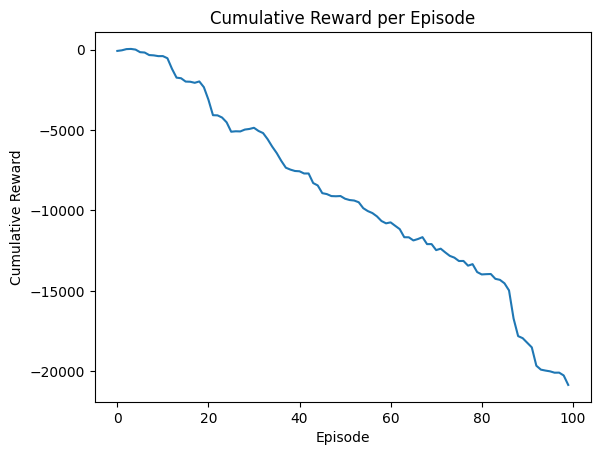

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rewards for each episode :
episode_scores = []

for epoch in range(100):
    maze.resetAgent()
    while maze.alive and maze.wumpusAlive or not maze.glitter:
      #explorarion rate decreases in each epoch
        action = agent.getAction(maze.xPos, maze.yPos, exploration=1.0/(epoch+1.0))
    agent.updatePolicy(learningRate=0.1)
    print('maze score is:', maze.score)
    episode_scores.append(maze.score)
    print('number of epochs:', epoch)

cumulative_rewards = np.cumsum(episode_scores)

plt.plot(cumulative_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward per Episode')
plt.show()


## **Cumulative Reward for DQN**

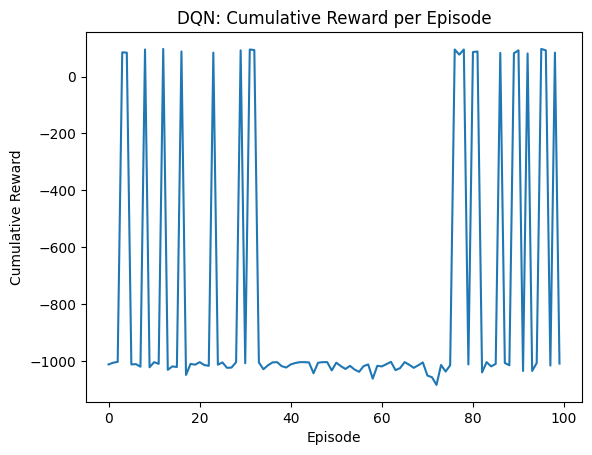

In [ ]:
# Plotting the cumulative reward per episode
plt.plot(rewards_per_episode_dqn)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('DQN: Cumulative Reward per Episode')
plt.show()

In [ ]:
# Calculate average reward per episode
avg_reward_q_learning = np.mean(cumulative_rewards[:])
avg_reward_dqn = np.mean(rewards_per_episode_dqn[:])

print(f'Average reward per episode for Q-learning: {avg_reward_q_learning}')
print(f'Average reward per episode for DQN: {avg_reward_dqn}')

Average reward per episode for Q-learning: -9050.23
Average reward per episode for DQN: -784.96


# **Part C**

## **Q-Learning**

Streaming output truncated to the last 5000 lines.
X X X X X X 
X . A . . X 
X . . . . X 
X P . . . X 
X . . . . X 
X X X X X X 

You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . A . . X 
X . . . . X 
X P . . . X 
X . . . . X 
X X X X X X 

You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . A . . X 
X . . . . X 
X P . . . X 
X . . . . X 
X X X X X X 

X X X X X X 
X A . . . X 
X . . . . X 
X P . . . X 
X . . . . X 
X X X X X X 

Current Position of A:  1 1
You shoot your arrow into the darkness, doesn't seem like you hit anything.
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . . . . X 
X A . . . X 
X P . . . X 
X . . . . X 
X X X X X X 

Current Position of A:  2 1
You shoot your arrow into the darkness, doesn't seem like you hit anything.
X X X X X X 
X . . . . X 
X . A . . X 
X P

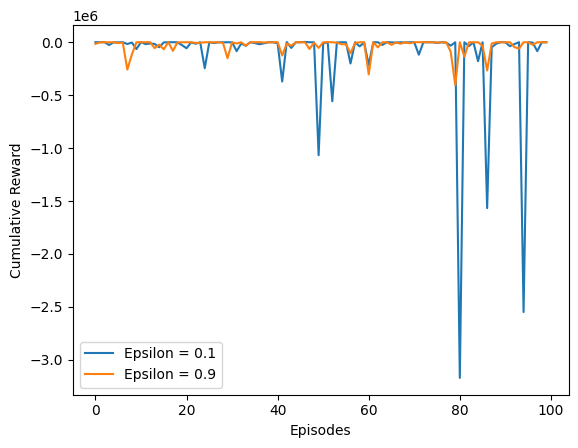

In [ ]:
agent_low_epsilon = Agent(17, 17)
agent_high_epsilon = Agent(17, 17)

episodes = 100
rewards_low_epsilon = []
rewards_high_epsilon = []

for epoch in range(episodes):
    # low exploration rate - epsilon = 0.1
    maze.resetAgent()
    total_reward_low = 0
    while maze.alive == True and maze.wumpusAlive == True or maze.glitter == False:
        action = agent_low_epsilon.getAction(maze.xPos, maze.yPos, exploration=0.1)
        total_reward_low += maze.score
    agent_low_epsilon.updatePolicy(learningRate=0.1)
    rewards_low_epsilon.append(total_reward_low)

    # high exploration rate - epsilon = 0.9
    maze.resetAgent()
    total_reward_high = 0
    while maze.alive == True and maze.wumpusAlive == True or maze.glitter == False:
        action = agent_high_epsilon.getAction(maze.xPos, maze.yPos, exploration=0.9)
        total_reward_high += maze.score
    agent_high_epsilon.updatePolicy(learningRate=0.1)
    rewards_high_epsilon.append(total_reward_high)

plt.plot(rewards_low_epsilon, label='Epsilon = 0.1')
plt.plot(rewards_high_epsilon, label='Epsilon = 0.9')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

## **DQN**

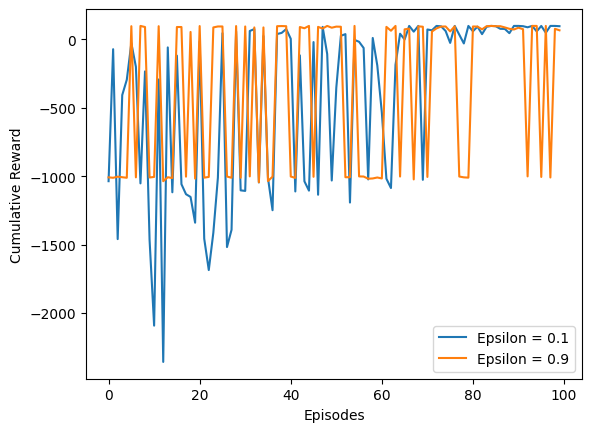

In [ ]:
# Training the agent with epsilon=0.1
epsilon = 0.1
env = WumpusWorld()
rewards_per_episode_dqn_low_epsilon = []

for episode in range(num_episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            q_values = dqn(state)
            action = torch.argmax(q_values).item()

        next_state, reward, done = env.step(action)
        total_reward += reward
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

        memory.append((state, action, reward, next_state, done))
        if len(memory) > 10000:
            memory.pop(0)

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*batch)
            batch_states = torch.cat(batch_states)
            batch_actions = torch.tensor(batch_actions)
            batch_rewards = torch.tensor(batch_rewards)
            batch_next_states = torch.cat(batch_next_states)
            batch_dones = torch.tensor(batch_dones, dtype=torch.float32)

            current_q_values = dqn(batch_states).gather(1, batch_actions.unsqueeze(1)).squeeze(1)
            next_q_values = dqn(batch_next_states).max(1)[0]
            expected_q_values = batch_rewards + (1 - batch_dones) * discount_factor * next_q_values

            loss = criterion(current_q_values, expected_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        state = next_state

    rewards_per_episode_dqn_low_epsilon.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Training the agent with epsilon=0.9
epsilon = 0.9
env = WumpusWorld()
rewards_per_episode_dqn_high_epsilon = []

for episode in range(num_episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1, 2, 3])
        else:
            q_values = dqn(state)
            action = torch.argmax(q_values).item()

        next_state, reward, done = env.step(action)
        total_reward += reward
        next_state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)

        memory.append((state, action, reward, next_state, done))
        if len(memory) > 10000:
            memory.pop(0)

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = zip(*batch)
            batch_states = torch.cat(batch_states)
            batch_actions = torch.tensor(batch_actions)
            batch_rewards = torch.tensor(batch_rewards)
            batch_next_states = torch.cat(batch_next_states)
            batch_dones = torch.tensor(batch_dones, dtype=torch.float32)

            current_q_values = dqn(batch_states).gather(1, batch_actions.unsqueeze(1)).squeeze(1)
            next_q_values = dqn(batch_next_states).max(1)[0]
            expected_q_values = batch_rewards + (1 - batch_dones) * discount_factor * next_q_values

            loss = criterion(current_q_values, expected_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        state = next_state

    rewards_per_episode_dqn_high_epsilon.append(total_reward)
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

# Plot the cumulative rewards
plt.plot(rewards_per_episode_dqn_low_epsilon, label='Epsilon = 0.1')
plt.plot(rewards_per_episode_dqn_high_epsilon, label='Epsilon = 0.9')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# **Part D**

## **DQN**

In [ ]:
consistent_episodes_dqn = 0
for i in range(0, num_episodes):
    if rewards_per_episode_dqn[i] == max(rewards_per_episode_dqn):  # Episode where the agent finds gold
        consistent_episodes_dqn += 1

# Print the number of consistent episodes
print(f'Number of episodes where DQN agent consistently found gold: {consistent_episodes_dqn}')


Number of episodes where DQN agent consistently found gold: 0
